# Twitter Sentiment Analysis using Python
--------------------------

<img src="https://user-images.githubusercontent.com/32620288/166145199-afde4677-0527-42b9-aadd-efeb406262da.png" width="1000" height="1">



*Description : This is a sentiment analysis program that parses the tweets fetches from twitter using Python*

----------------

#### Authentication:

In order to fetch tweets through Twitter API, one needs to register an App through their twitter account. Follow these steps for the same:

1. Open this [link](https://developer.twitter.com/en) and click the button: ‘Create New App’
2. Fill the application details. You can leave the callback url field empty.
3. Once the app is created, you will be redirected to the app page.
3. Open the ‘Keys and Access Tokens’ tab.
4. Copy ‘Consumer Key’, ‘Consumer Secret’, ‘Access token’ and ‘Access Token Secret’.

#### Implementation:

#### Importing the libraries

In [23]:
# Import Libraries

from tweepy import OAuthHandler
from textblob import TextBlob
import sys
import tweepy
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn Libraries
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

keys and tokens from the Twitter Dev Console
* consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXX'
* consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
* access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
* access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXX'

Due to privecy and security issue hiding Twitter Dev.keys and tokens numbers. And configuring the key and token number in excel to access the key and token number.
<img src="https://user-images.githubusercontent.com/32620288/166144598-88638047-1adb-475b-b398-6dbd33259026.png" width="800" height="1">



In [24]:
config = pd.read_csv("D:\Datasets of AB\dataset\config.csv")

#### Setting up twitter API

In [25]:
twitterApiKey= config['twitterApiKey'][0]
tweeterApiSecret= config['tweeterApiSecret'][0]
twitterApiAccessToken= config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret= config['twitterApiAccessTokenSecret'][0]

#### Authentication for Twitter API

In [26]:
# create OAuthHandler object
auth = tweepy.OAuthHandler(twitterApiKey, tweeterApiSecret)
# set access token and secret
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
# create tweepy API object to fetch tweets
twitterApi = tweepy.API(auth)

In [27]:
twitterAccount = "WorldBank"

#### Defining the querry to be searched

In [28]:
tweets = tweepy.Cursor(twitterApi.user_timeline,
                       screen_name=twitterAccount,
                       count=None,
                       since_id=None,
                       max_id=None,trim_user=True,exclude_replies=True,contribubtor_details=False,
                       include_entities=False).items(100);

In [29]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['Tweet'])

Unexpected parameter: contribubtor_details
Unexpected parameter: include_entities
Unexpected parameter: contribubtor_details
Unexpected parameter: include_entities
Unexpected parameter: contribubtor_details
Unexpected parameter: include_entities
Unexpected parameter: contribubtor_details
Unexpected parameter: include_entities
Unexpected parameter: contribubtor_details
Unexpected parameter: include_entities


In [30]:
df.head()

,Tweet
0,With women around the world having only 3/4 of...
1,Even before the war in Ukraine the prospects f...
2,"Climate action requires policy changes, it als..."
3,We asked YOU to share your thoughts on how to ...
4,World Bank Group President @DavidMalpassWBG wa...


In [31]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [45]:
#Rows and columns in the dataset
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   2
Count of rows in the data is:   100


#### Preprocessing the dataset

In [32]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [33]:
df.head()

,Tweet
0,With women around the world having only 3/4 of...
1,Even before the war in Ukraine the prospects f...
2,"Climate action requires policy changes, it als..."
3,We asked YOU to share your thoughts on how to ...
4,World Bank Group President @DavidMalpassWBG wa...


In [34]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['Tweet'], "@[\w]*")

In [35]:
df.head()

,Tweet,clean_tweet
0,With women around the world having only 3/4 of...,With women around the world having only 3/4 of...
1,Even before the war in Ukraine the prospects f...,Even before the war in Ukraine the prospects f...
2,"Climate action requires policy changes, it als...","Climate action requires policy changes, it als..."
3,We asked YOU to share your thoughts on how to ...,We asked YOU to share your thoughts on how to ...
4,World Bank Group President @DavidMalpassWBG wa...,World Bank Group President warns that as inte...


In [36]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

C:\Users\divak\AppData\Local\Temp/ipykernel_19748/3837419577.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")


,Tweet,clean_tweet
0,With women around the world having only 3/4 of...,With women around the world having only of...
1,Even before the war in Ukraine the prospects f...,Even before the war in Ukraine the prospects f...
2,"Climate action requires policy changes, it als...",Climate action requires policy changes it als...
3,We asked YOU to share your thoughts on how to ...,We asked YOU to share your thoughts on how to ...
4,World Bank Group President @DavidMalpassWBG wa...,World Bank Group President warns that as inte...


In [37]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,Tweet,clean_tweet
0,With women around the world having only 3/4 of...,With women around world having only legal righ...
1,Even before the war in Ukraine the prospects f...,Even before Ukraine prospects global growth da...
2,"Climate action requires policy changes, it als...",Climate action requires policy changes also en...
3,We asked YOU to share your thoughts on how to ...,asked share your thoughts best invest your com...
4,World Bank Group President @DavidMalpassWBG wa...,World Bank Group President warns that interest...


In [38]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [With, women, around, world, having, only, leg...
1    [Even, before, Ukraine, prospects, global, gro...
2    [Climate, action, requires, policy, changes, a...
3    [asked, share, your, thoughts, best, invest, y...
4    [World, Bank, Group, President, warns, that, i...
Name: clean_tweet, dtype: object

In [39]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [with, women, around, world, have, onli, legal...
1    [even, befor, ukrain, prospect, global, growth...
2    [climat, action, requir, polici, chang, also, ...
3    [ask, share, your, thought, best, invest, your...
4    [world, bank, group, presid, warn, that, inter...
Name: clean_tweet, dtype: object

In [40]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,Tweet,clean_tweet
0,With women around the world having only 3/4 of...,with women around world have onli legal right ...
1,Even before the war in Ukraine the prospects f...,even befor ukrain prospect global growth darke...
2,"Climate action requires policy changes, it als...",climat action requir polici chang also enorm f...
3,We asked YOU to share your thoughts on how to ...,ask share your thought best invest your commun...
4,World Bank Group President @DavidMalpassWBG wa...,world bank group presid warn that interest rat...


#### Exploratory Data Analysis

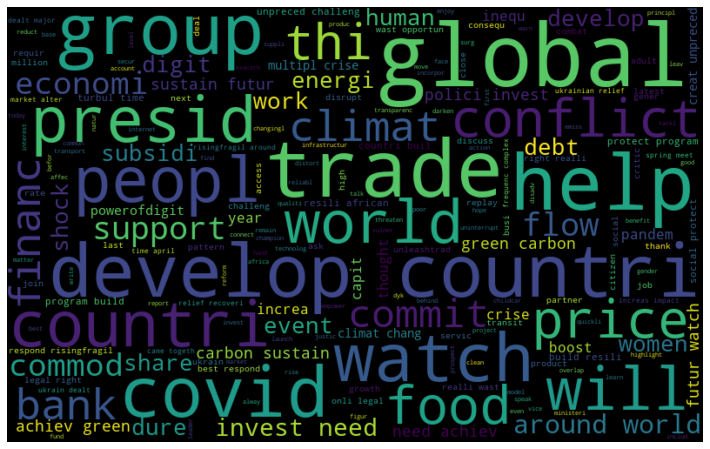

In [41]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags   

In [43]:
# extract hashtags from non-racist/sexist tweets
hashtags = hashtag_extract(df['clean_tweet'])

In [44]:
hashtags[:5]

[[], [], [], [], []]